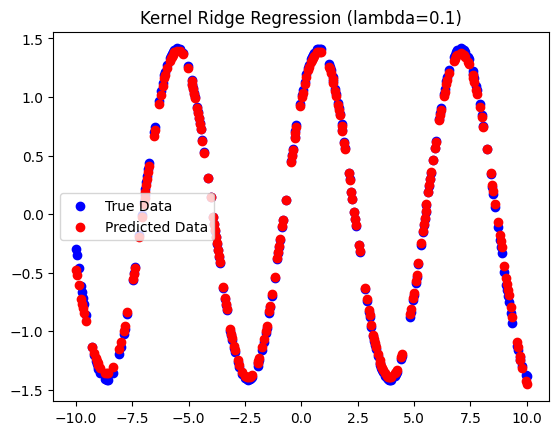

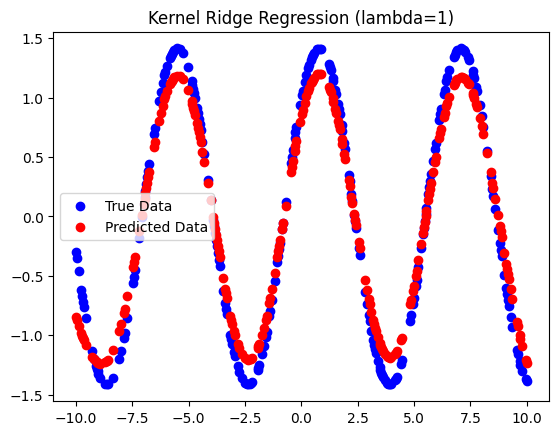

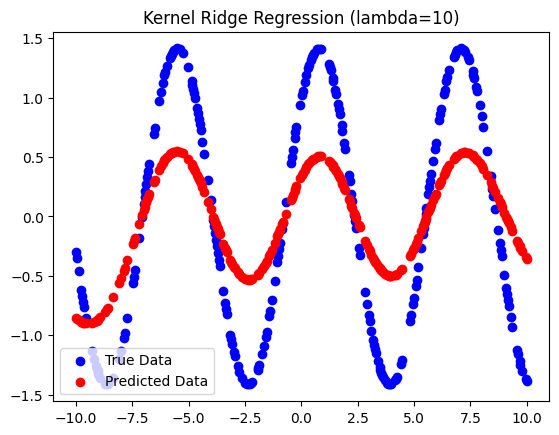

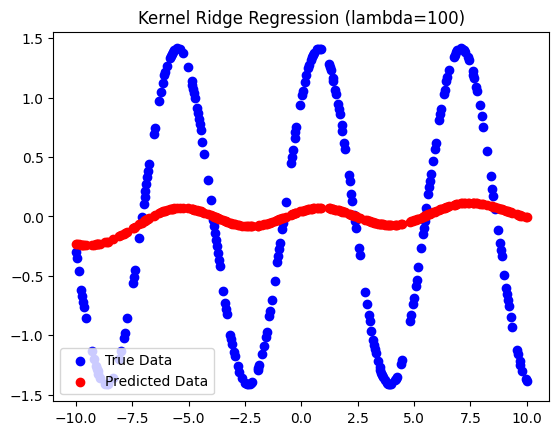

lambda = 0.1: RMSE = 0.0326
lambda = 1: RMSE = 0.1703
lambda = 10: RMSE = 0.6093
lambda = 100: RMSE = 0.9111


In [20]:
#par1 
#1
import numpy as np
import matplotlib.pyplot as plt

train_data = np.loadtxt("ridgetrain.txt")
test_data = np.loadtxt("ridgetest.txt")

x_train, y_train = train_data[:, 0:1], train_data[:, 1]
x_test, y_test = test_data[:, 0:1], test_data[:, 1]

lambdas = [0.1, 1, 10, 100]
gamma = 0.1
rmse = {}

for val in lambdas:
    K = np.exp(-gamma * (np.linalg.norm(x_train[:, None] - x_train, axis=2) ** 2))
    I = val * np.identity(len(x_train))
    alpha = np.linalg.solve(K + I, y_train)

    K_test = np.exp(-gamma * (np.linalg.norm(x_train[:, None] - x_test, axis=2) ** 2))
    predicted_output = np.dot(K_test.T, alpha)

    rmse[val] = np.sqrt(np.mean((y_test - predicted_output) ** 2))

    plt.figure()
    plt.scatter(x_test, y_test, color='blue', label='True Data')
    plt.scatter(x_test, predicted_output, color='red', label='Predicted Data')
    plt.title(f"Kernel Ridge Regression (lambda={val})")
    plt.legend()
    plt.show()


for val, r in rmse.items():
     print(f"lambda = {val}: RMSE = {r:.4f}")










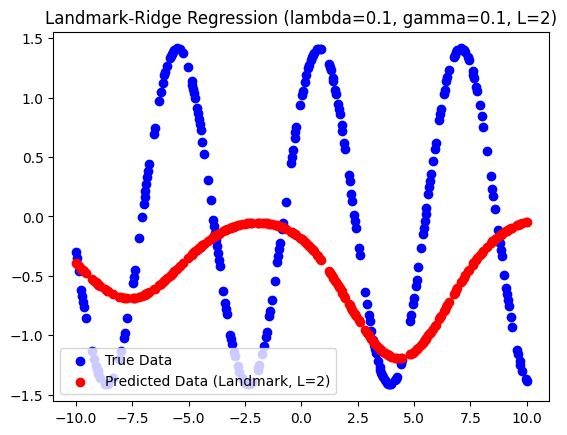

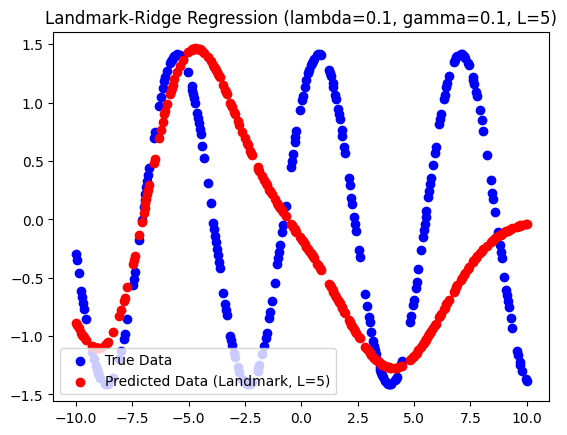

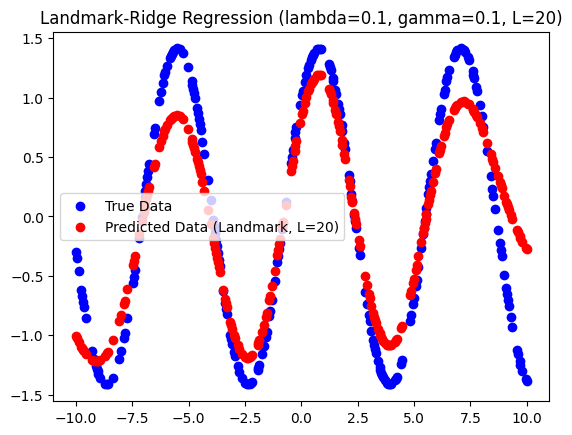

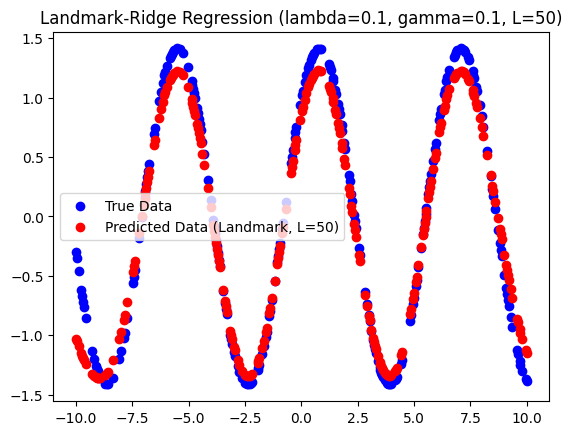

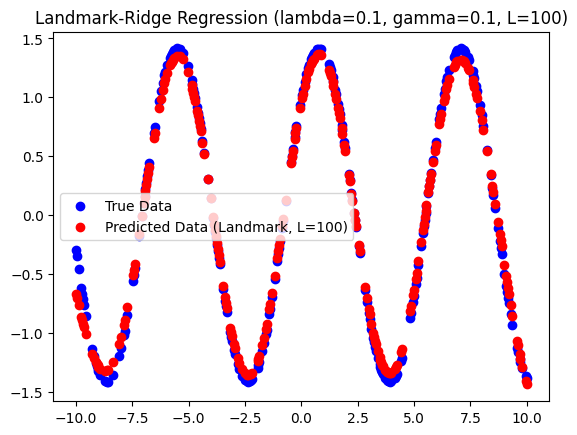

In [3]:
#part 1
#2
import numpy as np
import matplotlib.pyplot as plt

train_data = np.loadtxt("ridgetrain.txt")
test_data = np.loadtxt("ridgetest.txt")

x_train, y_train = train_data[:, 0:1], train_data[:, 1]
x_test, y_test = test_data[:, 0:1], test_data[:, 1]

gamma = 0.1
alpha = 0.1
length = len(x_train)
for L in [2, 5, 20, 50, 100]:
    temp = np.random.choice(length, L, replace=False)

    x_l = x_train[temp]
    y_l = y_train[temp]

    k_l = np.zeros((len(x_l), len(x_l)))
    for i in range(len(x_l)):
        for j in range(len(x_l)):
            k_l[i, j] = np.exp(-gamma * np.linalg.norm(x_l[i] - x_l[j]) ** 2)

    K_test_l = np.zeros((len(x_test), len(x_l)))
    for i in range(len(x_test)):
        for j in range(len(x_l)):
            K_test_l[i, j] = np.exp(-gamma * np.linalg.norm(x_test[i] - x_l[j]) ** 2)

    w = np.linalg.solve(k_l + alpha * np.identity(len(x_l)), y_l)
    y_pred_l = np.dot(K_test_l, w)

    plt.scatter(x_test, y_test, color='blue', label='True Data')
    plt.scatter(x_test, y_pred_l, color='red', label=f'Predicted Data (Landmark, L={L})')
    plt.title(f"Landmark-Ridge Regression (lambda={alpha}, gamma={gamma}, L={L})")
    plt.legend()
    plt.show()


